In [1]:
import healpy as hp
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

font = {'size'   : 16}
mpl.rc('font', **font)

In [2]:
from astropy.cosmology import Planck18 as P18

In [3]:
import astropy.units as u
P18.kpc_comoving_per_arcmin(.62).to(u.Mpc/u.deg)

<Quantity 40.75839605 Mpc / deg>

In [115]:
def nu_map_vals(od_map, ra, dec, mask):
    nside  = hp.get_nside(od_map)
    pixels = hp.ang2pix(nside, ra, dec, lonlat=True)
    mean_od = sum(od_map*mask)/sum(mask)
    rms = np.sqrt(sum((od_map-mean_od)**2*mask)/sum(mask))
    print("rms = ", rms)
    print("mean of smoothed overdensity map = ", mean_od)
    nu = ((od_map-mean_od)*mask) / rms
    hp.mollview(nu)
    return(nu,nu[pixels])
def smallpatch(odmap, odmap_ref, ralist, declist, index):
    patch = hp.cartview(odmap, lonra=[ralist[index]-.7, ralist[index]+.7], latra=[declist[index]-.7, declist[index]+.7], return_projected_map=True)
    ref_patch = hp.cartview(odmap_ref, lonra=[ralist[index]-.7, ralist[index]+.7], latra=[declist[index]-.7, declist[index]+.7], return_projected_map=True)
    fig, ax = plt.subplots()
    m = ax.imshow(patch[::-1],vmin=-1,vmax=1)
    ax.scatter(patch.shape[0]/2., patch.shape[1]/2., marker="*", s=100,color='white')
    ax.contour(ref_patch[::-1], c='w')
    plt.colorbar(m)   
    plt.show()
    plt.clf()
    return 

In [5]:
mask = hp.read_map("/mnt/raid-cita/mlokken/masks/y3_gold_2.2.1_RING_joint_redmagic_v0.5.1_wide_maglim_v2.2_mask_hpx_4096.fits")

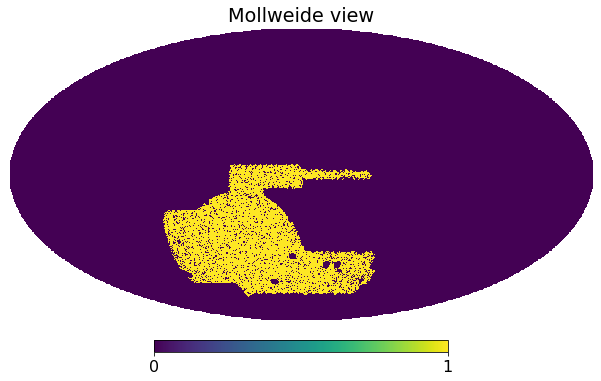

In [6]:
hp.mollview(mask)

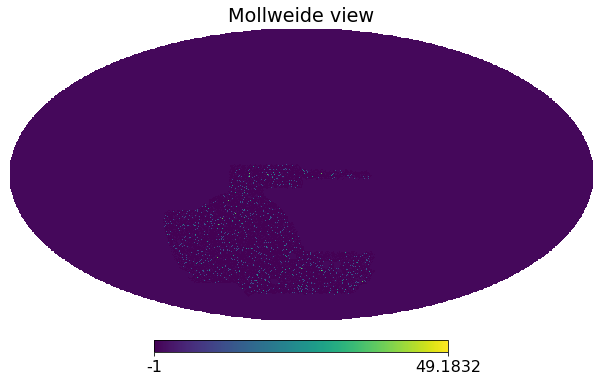

In [7]:
unsmoothed_map = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_zbin3.fits")
hp.mollview(unsmoothed_map)

In [78]:
map5  = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_z_0pt55_0pt7_smth_5Mpc_7a.fits")
map10 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_z_0pt55_0pt7_smth_10Mpc_14a.fits")
map15 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_z_0pt55_0pt7_smth_15Mpc_21a.fits")
map20 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_z_0pt55_0pt7_smth_20Mpc_29a.fits")
map25 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_z_0pt55_0pt7_smth_25Mpc_36a.fits")
map30 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_z_0pt55_0pt7_smth_30Mpc_43a.fits")
map35 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_z_0pt55_0pt7_smth_35Mpc_51a.fits")
map40 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_z_0pt55_0pt7_smth_40Mpc_58a.fits")
map45 = hp.read_map("/mnt/raid-cita/mlokken/data/number_density_maps/maglim/odmap_z_0pt55_0pt7_smth_45Mpc_65a.fits")

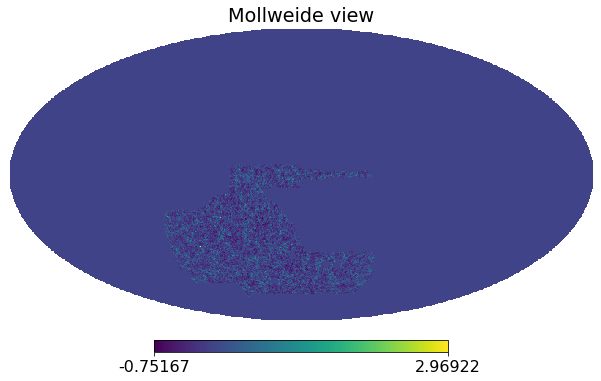

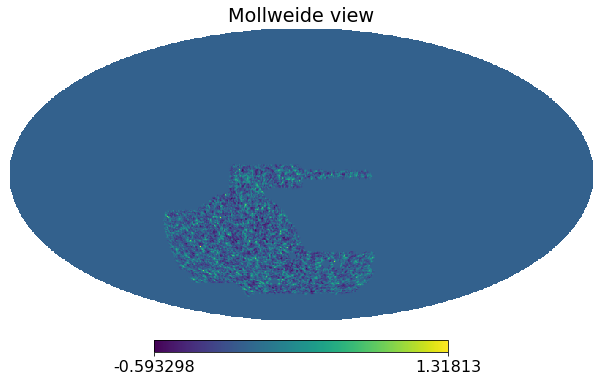

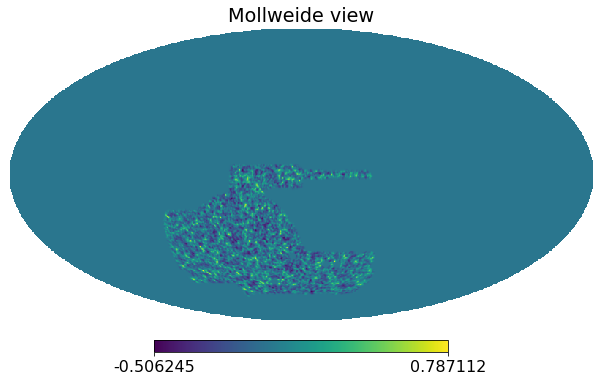

In [9]:
hp.mollview(map10)
hp.mollview(map20)
hp.mollview(map30)

In [10]:
cls = fits.open("/mnt/raid-cita/mlokken/data/cluster_cats/small_region_y3_gold_2.2.1_wide_sofcol_run2_redmapper_v6.4.22+2_lgt5_vl50_catalog.fit")
rm  = cls[1].data
hdr = cls[1].header
cls.close()

In [11]:
# reduce to lambda>20 clusters
rm = rm[rm['LAMBDA_CHISQ']>20]
# reduce to this redshift bin
rm = rm[(rm['Z_LAMBDA']>0.55) & (rm['Z_LAMBDA']<0.7)]
ra,dec = rm['RA'], rm['DEC']

In [12]:
# remove clusters where maglim mask is 0
clpix = hp.ang2pix(hp.get_nside(mask), ra, dec, lonlat=True)
unmasked_cls = (mask[clpix]>0)
print(len(ra))
ra,dec = ra[unmasked_cls], dec[unmasked_cls]
print(len(ra))

6869
6397


In [13]:
# # save these clusters
# import coop_setup_funcs as csf


In [14]:
# theta,phi = csf.DeclRatoThetaPhi(dec,ra)
# thetaphi  = np.zeros((len(dec),2))
# thetaphi[:,0] = theta
# thetaphi[:,1] = phi

In [67]:
# np.savetxt("/mnt/scratch-lustre/mlokken/stacking/data_ndmap/theta_of_r/rm_cls_lgt20_z_0pt55_0pt7.txt", thetaphi)

In [81]:
cl_nus.shape

(6, 6397)

rms =  0.43124420880490255
mean of smoothed overdensity map =  -0.0004116819633607451
rms =  0.2866000117946735
mean of smoothed overdensity map =  -0.000642632718488118
rms =  0.23186446569559538
mean of smoothed overdensity map =  -0.0007097885458417126
rms =  0.20004486409836983
mean of smoothed overdensity map =  -0.0007447637644104123
rms =  0.17800583307507648
mean of smoothed overdensity map =  -0.000766909246451134
rms =  0.16132106116445102
mean of smoothed overdensity map =  -0.0007822902464240863
rms =  0.14801092662907597
mean of smoothed overdensity map =  -0.0007948176727495459
rms =  0.13702142327684136
mean of smoothed overdensity map =  -0.0008063525083107566
rms =  0.12772596941547637
mean of smoothed overdensity map =  -0.0008176250747001627


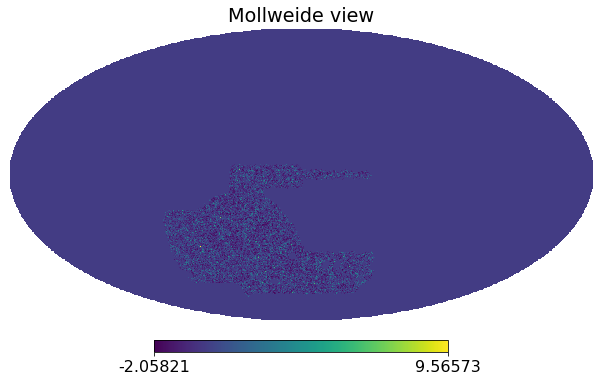

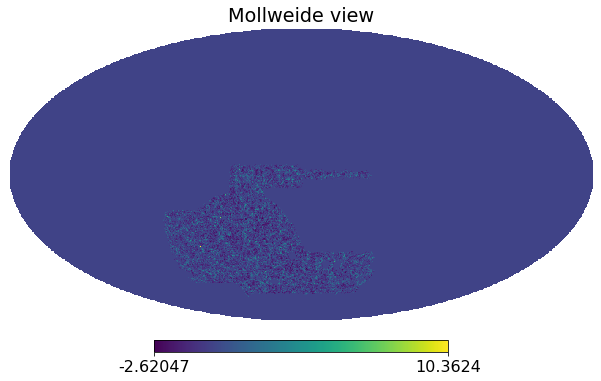

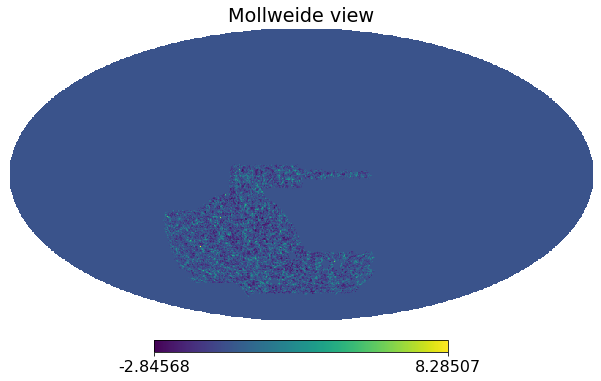

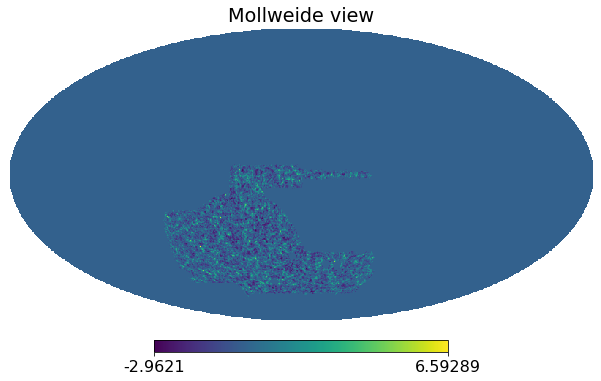

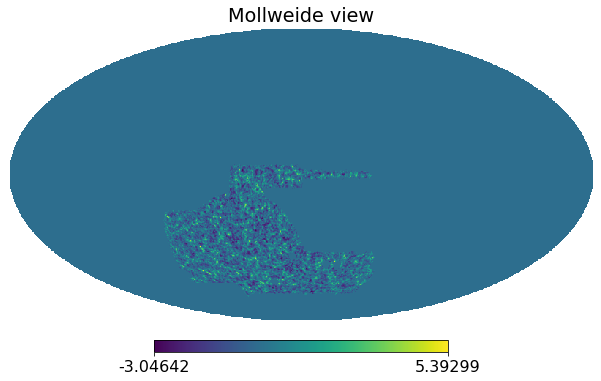

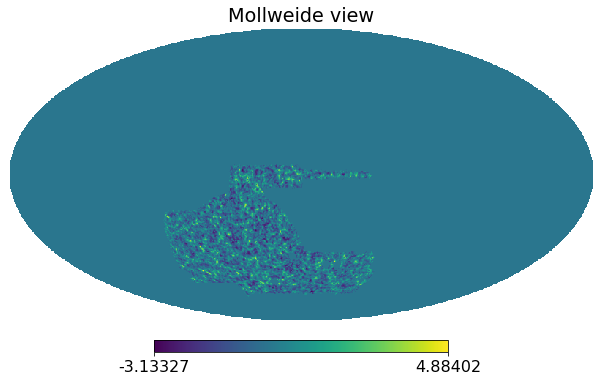

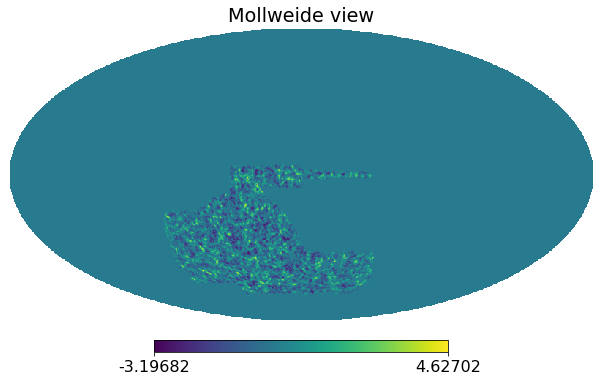

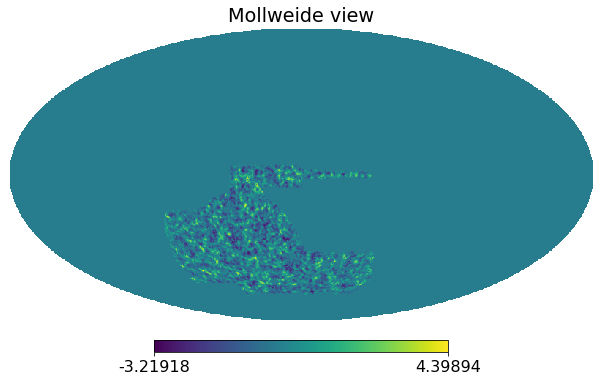

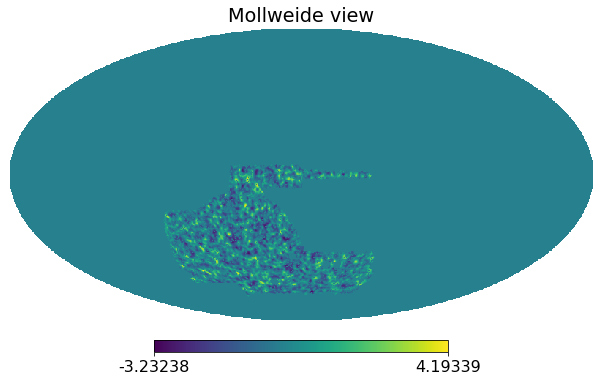

In [86]:
numaps = []
cl_nus = []
for smthmap in [map5,map10,map15,map20,map25,map30,map35,map40,map45]:
    numap, cl_nu = nu_map_vals(smthmap, ra, dec, mask)
    numaps.append(numap)
    cl_nus.append(cl_nu)


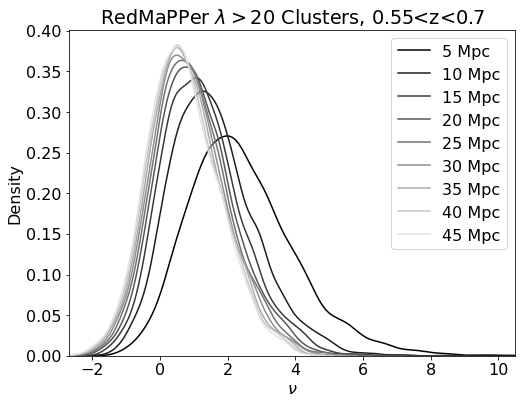

In [87]:
plt.figure(figsize=[8,6])
smth_scales = [5,10,15,20,25,30,35,40,45]
bins = np.linspace(-2.5,12.5,20)
cm = plt.get_cmap("gist_gray")
labels=[str(s) for s in smth_scales]
for i in range(len(cl_nus)):
#     sns.histplot(cl_nus[i], label=labels[i]+' Mpc', bins=bins, color=cm(i/len(cl_nus)), kde=True)
    sns.kdeplot(cl_nus[i], label=labels[i]+' Mpc', color=cm(i/len(cl_nus)))
plt.legend()
plt.xlabel(r"$\nu$")
plt.title(r"RedMaPPer $\lambda>20$ Clusters, 0.55<z<0.7")
plt.xlim([-2.7,10.5])
plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/redmapper_nudist_smoothing_maglim.png")

In [90]:
nu_of_r

array([[15.27478548, 11.32313563,  8.53242624,  6.65660208,  5.41807724,
         4.559183  ,  3.94686544,  3.5027046 ,  3.17347905],
       [10.90697366,  5.22420427,  3.2002769 ,  2.19083841,  1.59917759,
         1.22132146,  0.96654749,  0.79316875,  0.68059843],
       [ 5.12354694,  1.81488634,  0.77120868,  0.40675323,  0.24995834,
         0.15024328,  0.05827617, -0.03263349, -0.11651865],
       [ 9.93698373,  3.99639527,  2.04586086,  1.12692938,  0.58599418,
         0.21107703, -0.08106321, -0.32260494, -0.52424288],
       [ 7.03106037,  4.94783313,  3.93113924,  3.47115566,  3.15045037,
         2.87984011,  2.63486909,  2.40564641,  2.18890501],
       [10.42306344,  5.80919376,  4.45630019,  3.75283508,  3.24796067,
         2.86080208,  2.55397002,  2.30234693,  2.08948581],
       [ 9.67485857,  6.32919141,  4.89702216,  4.08462062,  3.49288535,
         3.04687288,  2.7356487 ,  2.5383554 ,  2.42434702],
       [ 9.46782351,  4.86831535,  3.48929991,  3.05825447,  2

In [96]:
len(cl_nus[0])

6397

In [97]:
ncl = 100
nu_of_r = np.zeros((ncl,9))
for i in range(ncl):
    prof = [nulist[i] for nulist in cl_nus]
    nu_of_r[i,:] = prof


In [98]:
# cluster 55 is interesting, 63
# 68 is great

Text(0.5, 1.0, '$\\nu(R_f)$ for 10 cluster locations')

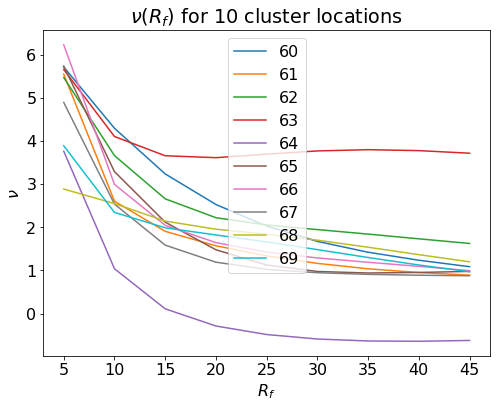

In [99]:
plt.figure(figsize=[8,6])
ncl = 10
for i in range(60,70):
    plt.plot(smth_scales, nu_of_r[i,:], alpha=1, label=i)
plt.legend()
plt.xlabel(r"$R_f$")
plt.ylabel(r"$\nu$")
plt.title(r"$\nu(R_f)$ for {:d} cluster locations".format(ncl))

In [100]:
cl_nus = np.asarray(cl_nus)

In [101]:
cl_nus.shape

(9, 6397)

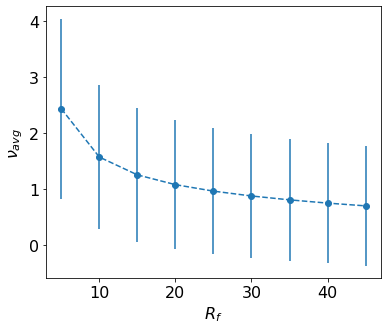

In [104]:
plt.figure(figsize=[6,5])
plt.errorbar(smth_scales,np.mean(cl_nus, axis=1), yerr=np.std(cl_nus,axis=1), fmt='o', linestyle='dashed')
plt.xlabel(r"$R_f$")
plt.ylabel(r"$\nu_{avg}$")
plt.savefig("/home/mlokken/oriented_stacking/plots/paper2/redmapper_nuavg_smoothing_maglim.png")

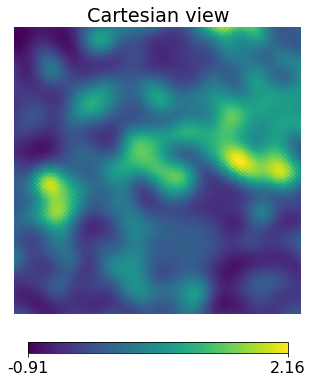

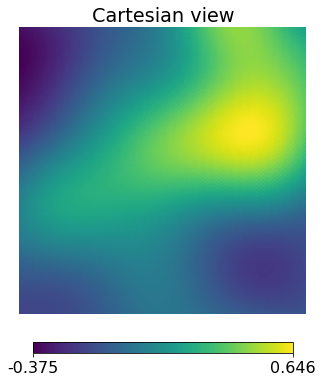

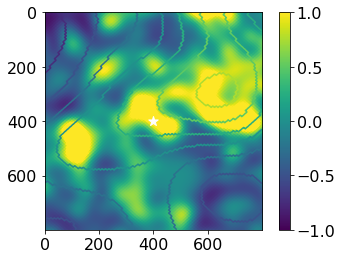

<Figure size 432x288 with 0 Axes>

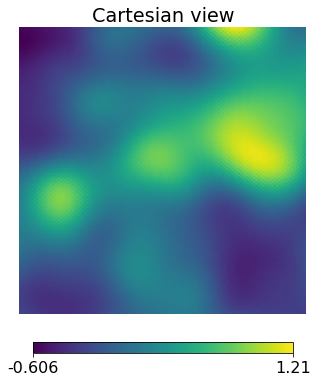

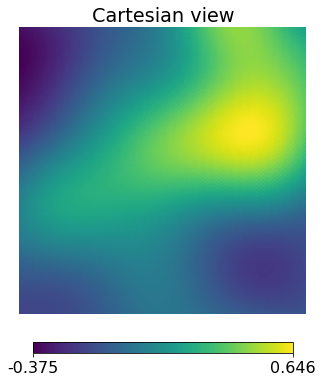

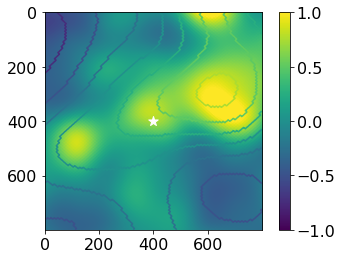

<Figure size 432x288 with 0 Axes>

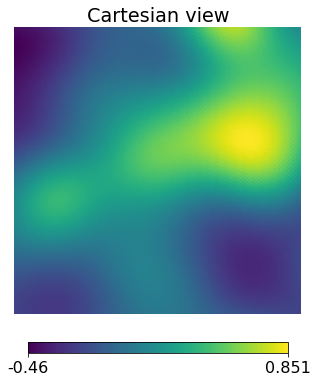

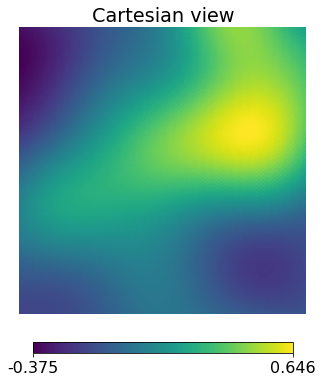

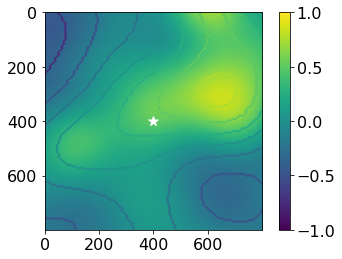

20


<Figure size 432x288 with 0 Axes>

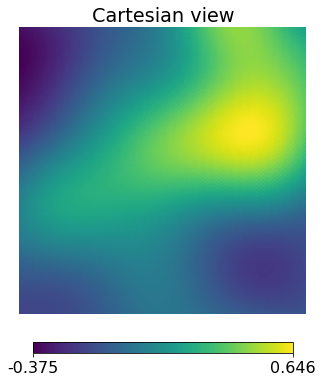

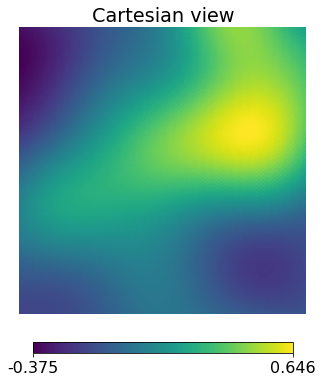

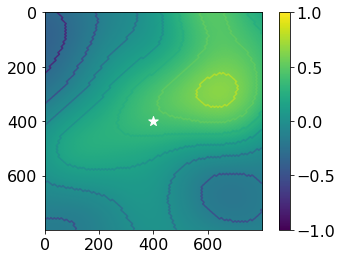

<Figure size 432x288 with 0 Axes>

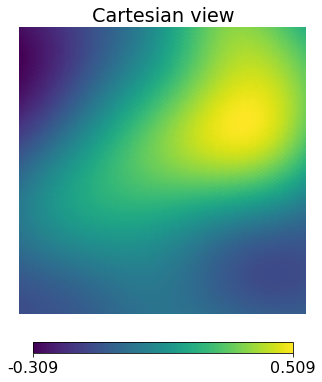

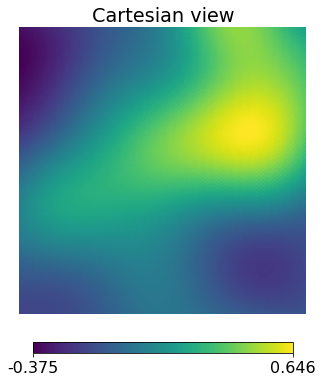

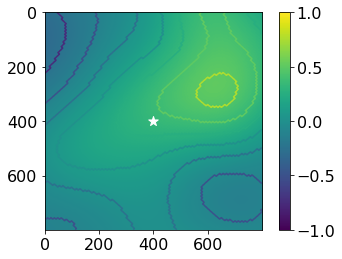

<Figure size 432x288 with 0 Axes>

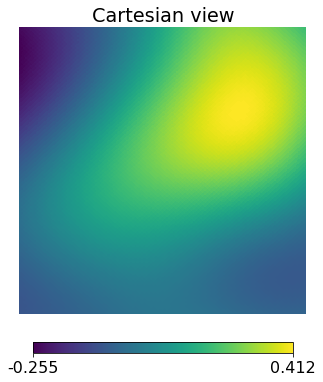

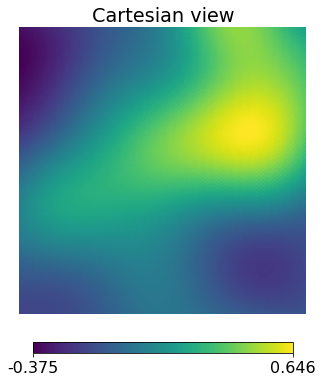

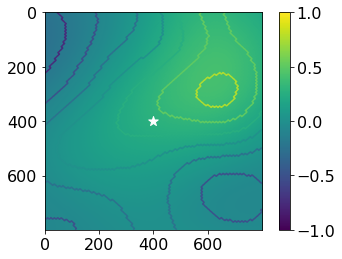

<Figure size 432x288 with 0 Axes>

In [114]:
idx = 68
# smallpatch(unsmoothed_map, ra, dec, idx)

smallpatch(map5, map20, ra, dec, idx)
smallpatch(map10, map20, ra, dec, idx)
smallpatch(map15, map20, ra, dec, idx)
print("20")
smallpatch(map20, map20, ra, dec, idx)
smallpatch(map25, map20, ra, dec, idx)
smallpatch(map30, map20, ra, dec, idx)


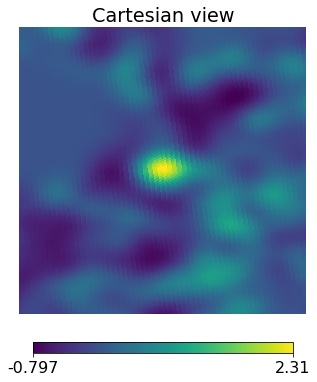

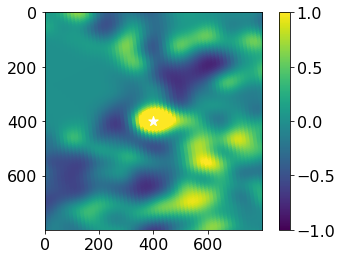

<Figure size 432x288 with 0 Axes>

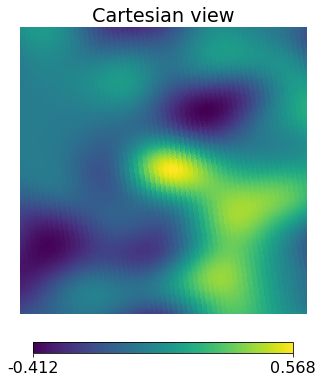

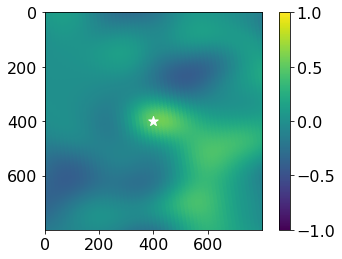

<Figure size 432x288 with 0 Axes>

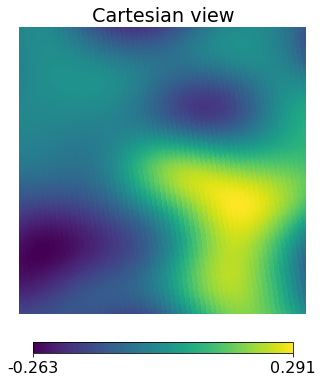

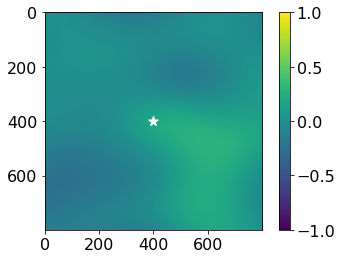

<Figure size 432x288 with 0 Axes>

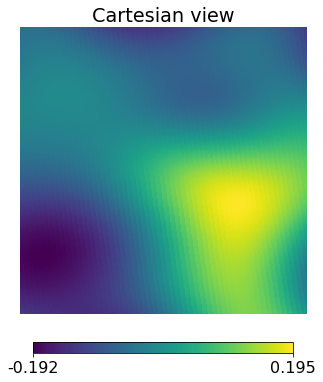

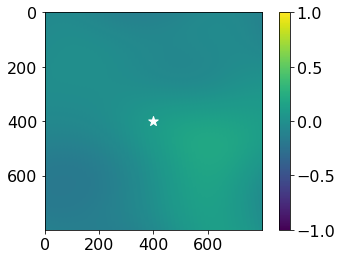

<Figure size 432x288 with 0 Axes>

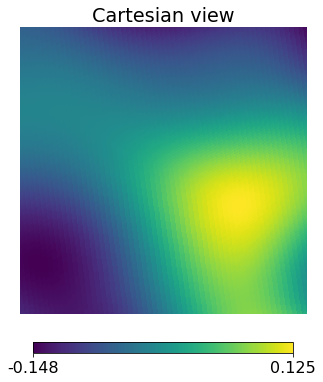

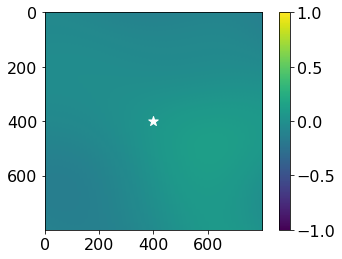

<Figure size 432x288 with 0 Axes>

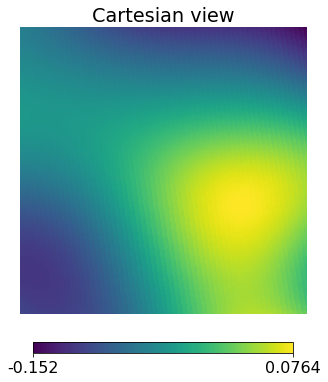

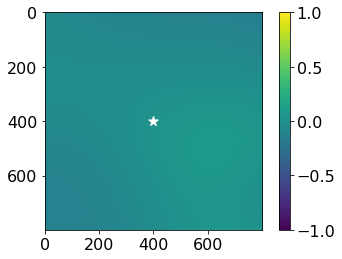

<Figure size 432x288 with 0 Axes>

In [56]:
smallpatch(map5, ra, dec, 2)
smallpatch(map10, ra, dec, 2)
smallpatch(map15, ra, dec, 2)
smallpatch(map20, ra, dec, 2)
smallpatch(map25, ra, dec, 2)
smallpatch(map30, ra, dec, 2)